# Project: Investigate a Dataset - No-show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#References">References</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> The No-show Appointments dataset has information of about 11,000 medical appointments in Brazil. The data was collected to examine if patients show up for or miss their appointments. The data set has patient information concerning their;                               
PatientId: Patient Identification number                                                                                           
AppointmentID: Patient appointment number                                                                                            
Gender: Male or Female                                                                                                                            
ScheduledDay: Date appointment was scheduled                                                                                         
AppointmentDay: Appointment date      
Age: How old the patient is                                                                           
Neighbourhood: location of the hospital                                                                                                                                                                                                                   
Scholarship: whether or not the patient is enrolled in Brasilian welfareprogram                                                               
Hipertension: Has Hipertention or not                                                                                                                                                                                                                           Diabetes: Has diabetes or not                                                                                                                                                                                                              
Alcoholism: An alcoholic or not                                                                                                      
Handcap: Handicapped or not                                                                                                            
SMS_received:Received SMS or not                                                                                                           
 No-show: Showed up for appointment or not


### Questions for Analysis
> 1. Examine the association between SMS and Appointment status(keeping or missing appointment)
2. Examine the association between appointment gap and missed appointment 

In [1]:
# Packages to be used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
%matplotlib inline

In [2]:
# # Upgrade pandas to use dataframe.explode() function. 
# !pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling


#### Load dataset, examine data structure, clean, trim and perform descriptive statistics

##### Load and preview the dataset 

In [5]:
%timeit df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

109 ms ± 633 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


##### Check for number of observations and variables in the dataset

In [4]:
df.shape

(110527, 14)

##### Check the column names to examine format and if there is need to rename variable names

In [5]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

##### Inspect data set for data types, unique values, counts and missing values

In [6]:
# Helper function to inspect and assess the data characteristics
def get_data_summary(data):
    summary = pd.concat([data.dtypes, data.nunique(),
                         data.count(), data.isnull().sum()],
                        keys=["dtypes", "nunique", "count", "missing"],
                        axis=1)
    return summary

In [7]:
# Assess data characteristics
get_data_summary(df)

,dtypes,nunique,count,missing
PatientId,float64,62299,110527,0
AppointmentID,int64,110527,110527,0
Gender,object,2,110527,0
ScheduledDay,object,103549,110527,0
AppointmentDay,object,27,110527,0
Age,int64,104,110527,0
Neighbourhood,object,81,110527,0
Scholarship,int64,2,110527,0
Hipertension,int64,2,110527,0
Diabetes,int64,2,110527,0


#### Findings
The data set has 110,527 observations(patients records) and 14 variables. it contains string, float and numerical values. There are no missing values. Some variable names maybe problematic during analysis e.g 'No-show', some variables are not needed analysis of the research questions and ScheduledDay and AppointmentDay need to be transformed for ease of analysis . The dependent variable needs to be coded


### Data Cleaning
> Rename column names if neccessary                                                                                               
Remove unnecessary variables                                                                                                   
Encode                                                                                                                      
Transform some data

##### Rename some column names to ensure consistency and also so to remove characters that may throw up errors when subsetting

In [8]:
df.rename(columns={'No-show':'Appointment_status'}, inplace=True)

##### Drop unnecessary colunms: these columns won't be useful to answer the proposed questions

In [9]:
df.drop(['PatientId', 'AppointmentID', 'Neighbourhood'], axis = 1, inplace = True)

##### Convert string values to be able to perform discriptive analysis 

In [10]:
df['Appointment_status'] = df['Appointment_status'].replace({'No' :1, 'Yes': 0}).astype('Int32')

##### Convert scheduled day and appointment day to date format: this is neccessary to be able calculate duration

In [11]:
df.ScheduledDay = pd.to_datetime(df.ScheduledDay).dt.date
df.AppointmentDay = pd.to_datetime(df.AppointmentDay).dt.date

##### Generate the number of days between scheduled day and appointment day: this is necessary to answer the proposed research question

In [12]:
df['Appointment_gap'] = (df.AppointmentDay - df.ScheduledDay).dt.days

##### Baseline descriptive statistics to have an overview of the spread of the observations

In [13]:
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Appointment_status,Appointment_gap
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.798067,10.183702
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444,15.254996
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,15.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,179.000000


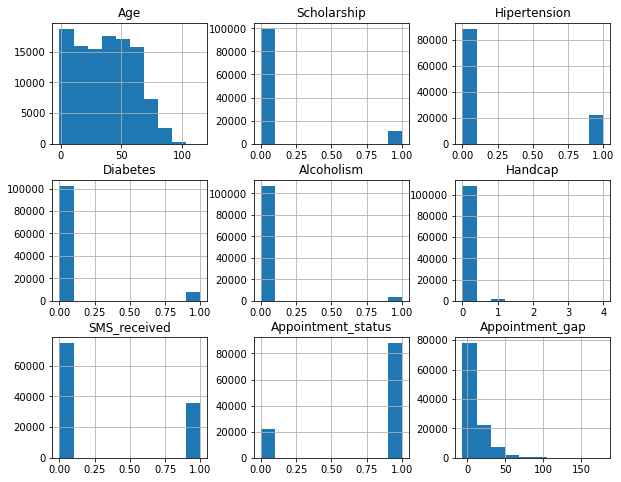

In [14]:
# Examine the distribution of data
df.hist(figsize=(10,8));

#### Findings
The age distribution looks okay although there are outliers and some invalid entries(-1),                                            
The appointment gap also has values less than 0 meaning the appointment day is earlier than the scheduled day which is invalid          
The other variables are categorical                                                                                                      
Hence we drop the invalid enteries
##### Examine invalid entries

In [15]:
invalid_age = df.Age < 0
invalid_appointment_gap = df.Appointment_gap< 0

In [16]:
df[invalid_age]
#df[invalid_appointment_gap]

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Appointment_status,Appointment_gap
99832,F,2016-06-06,2016-06-06,-1,0,0,0,0,0,0,1,0


In [17]:
# Drop invalid entries
df.drop(df[invalid_age].index, inplace=True)
df.drop(df[invalid_appointment_gap].index, inplace=True)

/var/folders/fx/22rg0t156k7dwk44xj06wbdw0000gn/T/ipykernel_2462/444707471.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.drop(df[invalid_appointment_gap].index, inplace=True)


<a id='eda'></a>
## Exploratory Data Analysis

#### First we explore the dependent variable Appointment status

##### Explore correlation between target variable and other variables in the dataset; to examine the strength of assocociation

In [18]:
df.corr()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Appointment_status,Appointment_gap
Age,1.000000,-0.092469,0.504599,0.292398,0.095811,0.078101,0.012629,0.060320,0.034813
Scholarship,-0.092469,1.000000,-0.019738,-0.024899,0.035019,-0.008555,0.001182,-0.029166,-0.030435
Hipertension,0.504599,-0.019738,1.000000,0.433082,0.087967,0.080162,-0.006285,0.035662,-0.017236
Diabetes,0.292398,-0.024899,0.433082,1.000000,0.018471,0.057578,-0.014561,0.015158,-0.027200
Alcoholism,0.095811,0.035019,0.087967,0.018471,1.000000,0.004668,-0.026154,0.000181,-0.038527
Handcap,0.078101,-0.008555,0.080162,0.057578,0.004668,1.000000,-0.024097,0.006290,-0.019774
SMS_received,0.012629,0.001182,-0.006285,-0.014561,-0.026154,-0.024097,1.000000,-0.126502,0.398128
Appointment_status,0.060320,-0.029166,0.035662,0.015158,0.000181,0.006290,-0.126502,1.000000,-0.186320
Appointment_gap,0.034813,-0.030435,-0.017236,-0.027200,-0.038527,-0.019774,0.398128,-0.186320,1.000000


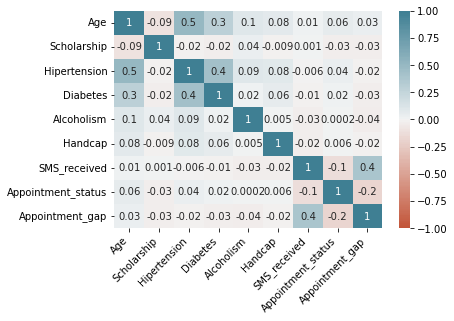

In [19]:
# Correlation plot
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    annot=True, fmt=".1g"
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

##### Examine the the distribution across the classes in the dependent variable

In [20]:
(df['Appointment_status'].value_counts(normalize=True))*100

1    79.810172
0    20.189828
Name: Appointment_status, dtype: Float64

##### visualize the appointment status 

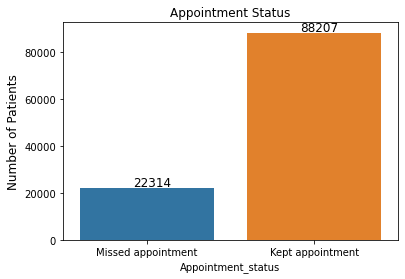

In [21]:
ax = sns.countplot(data = df, x = 'Appointment_status')
labels = ['Missed appointment', 'Kept appointment']
ax.set_ylabel('Number of Patients', fontsize=12)
ax.set_title('Appointment Status')
ax.set_xticklabels(labels)
for bar in ax.patches: 

    ax.annotate(format(bar.get_height(), '.0f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=12, xytext=(5, 5), 
                   textcoords='offset points')

In [22]:
# Assign class labels 
kept_appointment = df['Appointment_status'][df['Appointment_status'] == 1]
missed_appointment = df['Appointment_status'][df['Appointment_status'] == 0]

#### Findings 
80%(n=88,208) of the patients kept their appointment while 20%(n=22,319) missed their appointment.

From the correlation analysis, examining the correlation of all variables with the dependent variable, SMS received and the Appointment gap have the strongest association with appointment status compared to other variables. however association is negative

### Research Question 1: Examine the association between SMS and Appointment status(keeping or missing appointment)

##### Examine the percentage distribution across categories

In [23]:
(pd.crosstab(df['SMS_received'], df['Appointment_status'], margins=False, normalize= 'index'))*100

Appointment_status,0,1
SMS_received,,
0,16.697984,83.302016
1,27.574545,72.425455


##### Visualize the distribution of appointment status across those who received or didnt receive SMS reminder

Text(0, 0.5, 'Number of Patients')

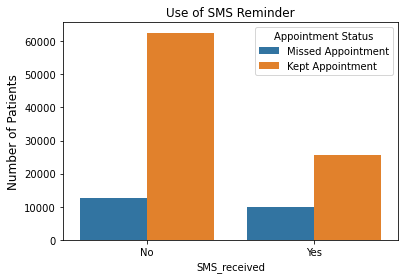

In [24]:
ax = sns.countplot(data = df, x = 'SMS_received', hue='Appointment_status')
labels = ['No', 'Yes']
ax.set_xticklabels(labels)
ax.legend(labels=['Missed Appointment', 'Kept Appointment'], title='Appointment Status')
ax.set_title('Use of SMS Reminder')
ax.set_ylabel('Number of Patients', fontsize=12)

#### Findings
From the analysis above, only about 17% of patients who didnt receieve an SMS reminder missed their appointment while majority (83%) still showed up for their appointment.  For patients who received an SMS reminder, 28% of them still didnt show up for their appointment. We observe that receiving an SMS reminder may not necessarily mean patients will not miss their appointments as a higher percentage(28%) of those who received still didn't show up compared to about 17% if those who didn't receive ata all.

### Research Question 2: Examine the association between appointment gap and missed appointment

##### First examine the independent variable- Appointment_gap

In [25]:
df.Appointment_gap.describe()

count    110521.000000
mean         10.184345
std          15.255153
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: Appointment_gap, dtype: float64

#### Appointment gap                                                                                                                       
 1 week or less- short                                                                                                                
 1-2 weeks - medium                                                                                                                     
 2 weeks or more - long
 ##### Categorize the appointment gap into 3 groups inorder to make meaningful comparisons among groups

In [26]:
Appointment_gap = df["Appointment_gap"]

cond_list = [Appointment_gap < 8, Appointment_gap < 15, Appointment_gap >= 15]
choice_list = ["Short", "Medium", "Long",]

df["Appointment_gap_cat"] = np.select(cond_list, choice_list)

In [27]:
# Examine the percentage 
(pd.crosstab(df['Appointment_gap_cat'], df['Appointment_status'], margins=False, normalize= 'index'))*100

Appointment_status,0,1
Appointment_gap_cat,,
Long,32.743522,67.256478
Medium,30.469854,69.530146
Short,13.518594,86.481406


##### Visualize distribution of appointment staus among the appointment gap groups

Text(0, 0.5, 'Number of Patients')

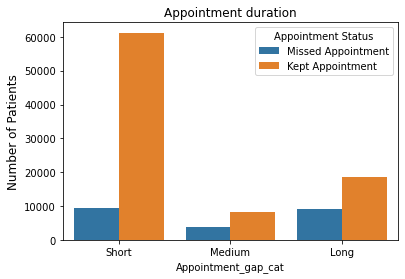

In [28]:
ax = sns.countplot(data = df, x = 'Appointment_gap_cat', hue='Appointment_status')
ax.legend(labels=['Missed Appointment', 'Kept Appointment'], title='Appointment Status')
ax.set_title('Appointment duration')
ax.set_ylabel('Number of Patients', fontsize=12)

#### Findings 
From the above, it is observed that 14% of patients who had appointments in 1 week or less missed their appointment while 86% kept their appointment. For those with 1-2 weeks appointment 30% missed their appointment and 33% of those with more than 2 weeks appointment missed. We can observe an increase in the percentage of patients who missed their appointments as the number of days between their scheduled day and appointment day increased

<a id='conclusions'></a>
## Conclusions

In conclusion, from the analysis above;                                                                                              <li> SMS reminders do not seem to improve the probability of patients showing up for their appointments                              <li> The farther the appointment date from the scheduled day the more patients who miss their appointments
### Limitations
<li> The conclusions are just based on data analysis and limited to examining relationship and not causation as no statistical test was done
<li> Most of the variables were categorical hence, the inability to show strong correlations
<li> We do not have complete details concerning those who missed their appointment, for instance if they had showed up before thier appointment day and didn't need to show up for their scheduled appointment.


<a id='References'></a>
## References

https://stackoverflow.com/questions/67256242/create-a-column-to-categorize-numerical-values-in-python
https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.axes.Axes.get_legend_handles_labels.html